In [50]:
import os
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
MODEL_PATH = os.path.join(os.getcwd(), './runs/detect/train8/weights/best.pt')
IMG_PATH = os.path.join(os.getcwd(), '../nerf_vision/processed/3_pts/')

In [3]:
# Load model
model = YOLO("yolov8n.pt")
model = YOLO(MODEL_PATH)

In [17]:
#Iterate through images in IMG_PATH
img_cnt = 0

while True:
    
    img_path = os.path.join(IMG_PATH, 'images/' + str(img_cnt) + '.png')
    
    #Open image
    img = cv2.imread(img_path)
    results = model.predict(source=img, save=False) 

    #Show image and bounding boxes
    plt.imshow(np.squeeze(results.render()))
    plt.show()

    break




0: 384x640 (no detections), 7.3ms
Speed: 2.5ms preprocess, 7.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


AttributeError: 'list' object has no attribute 'render'


0: 640x480 1 book, 8.2ms
Speed: 2.8ms preprocess, 8.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


[      216.1      305.43      1323.3      1874.3]


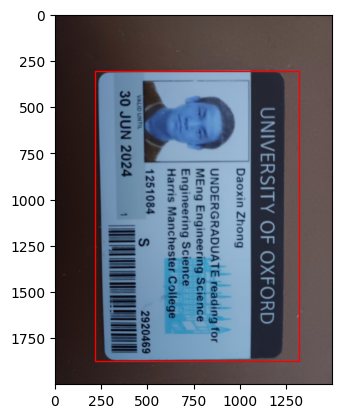

In [65]:
model = YOLO("yolov8n.pt")
img_path = "/home/boomalope/Downloads/20230908_175153.jpg"
img = cv2.imread(img_path)
results = model(source=img)

for r in results:
    #Plot image 
    plt.imshow(np.squeeze(r.orig_img))
    ax = plt.gca()
    box = r.boxes.xyxy.detach().cpu().numpy()[0]
    print(box)
    rect = matplotlib.patches.Rectangle((box[0],box[1]),box[2]-box[0],box[3]-box[1],linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    plt.show()